# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from keras.callbacks import EarlyStopping
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from keras.utils import np_utils
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from keras.utils.vis_utils import plot_model


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'regression'

In [3]:
stacking = 'True'

In [4]:
data_size = 'small'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.13/dataset/concrete_data.csv')

In [6]:
target_col = 'Strength'

#### Thresholds

In [7]:
threshold_NaN = 0.5

In [8]:
threshold_cat = 5

In [9]:
threshold_Z = 3.0

In [10]:
threshold_corr = 0.95

In [11]:
threshold_model = 5

In [12]:
threshold_score = 0.5

#### Drop user's columns:

In [13]:
user_drop_cols = []

In [14]:
df = df.drop(user_drop_cols, axis=1)

#### Dataset copy

In [15]:
df_copy = df.copy()

### Dataset Information

In [16]:
df.shape

(1030, 9)

#### Some records

In [17]:
display(df)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


#### Dataframe structure

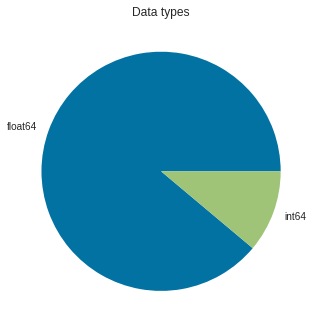

In [18]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [19]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast_Furnace_Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly_Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse_Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine_Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Which columns could be categorical ?

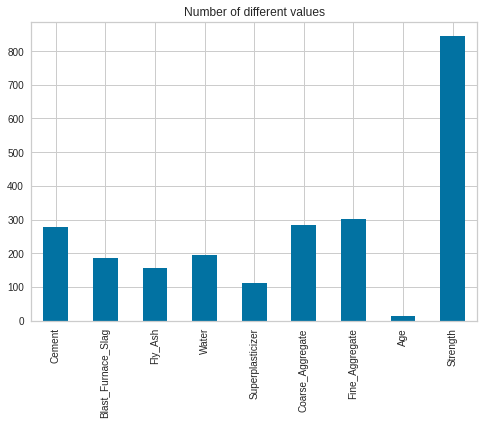

In [20]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [21]:
duplicates(df)

Number of rows before removing: 1030
Number of duplicate rows: 25
Number of rows after removing: 1005


,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


#### Drop NaN:

In [22]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [23]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [24]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [25]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: Cement
Encoding numeric column: Blast_Furnace_Slag
Encoding numeric column: Fly_Ash
Encoding numeric column: Water
Encoding numeric column: Superplasticizer
Encoding numeric column: Coarse_Aggregate
Encoding numeric column: Fine_Aggregate
Encoding numeric column: Age
Encoding numeric column: Strength


#### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


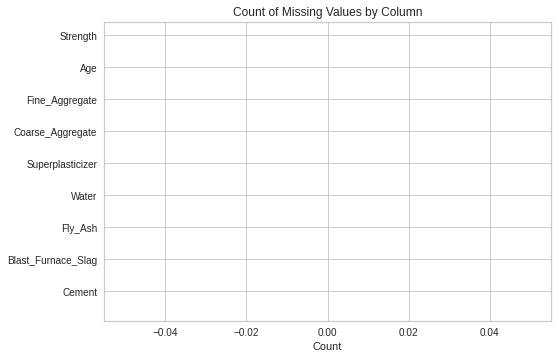

In [26]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [27]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [28]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.07MB
Memory usage after optimization is: 0.02MB
Decreased by 74.9%


##### Dataframe structure after compression

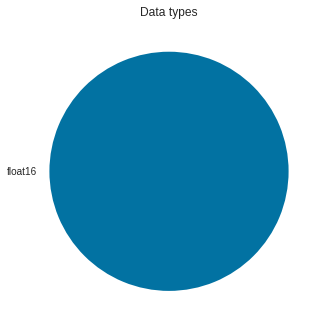

In [29]:
plot_dataframe_structure(df)

#### Outliers:

In [30]:
df = outliers(df, threshold_Z)

Using Z_score,  49  rows will be suppressed.


#### Splitting dataframe in features and targets

In [31]:
y = df[target_col]

In [32]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

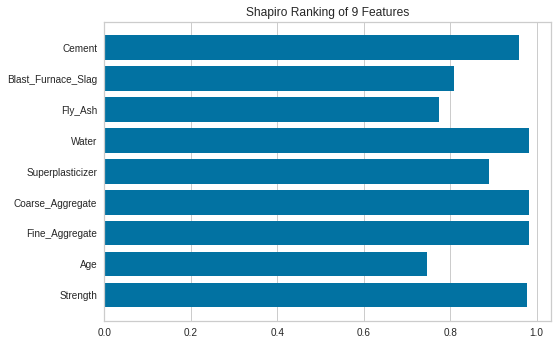

In [33]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

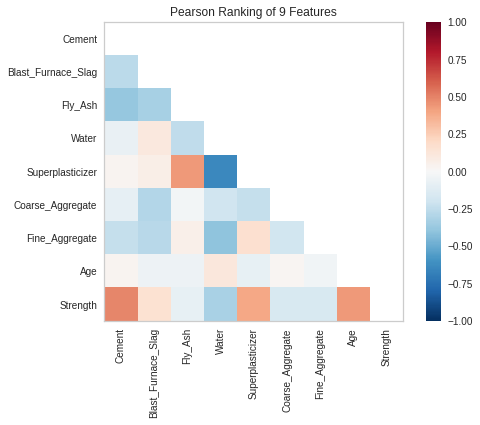

In [34]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

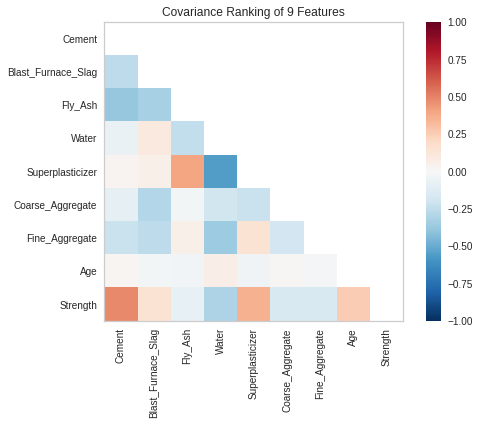

In [35]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

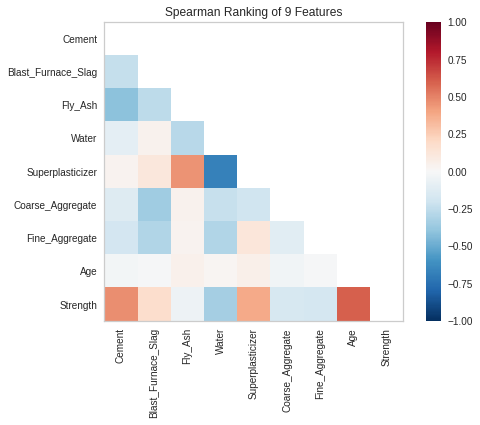

In [36]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

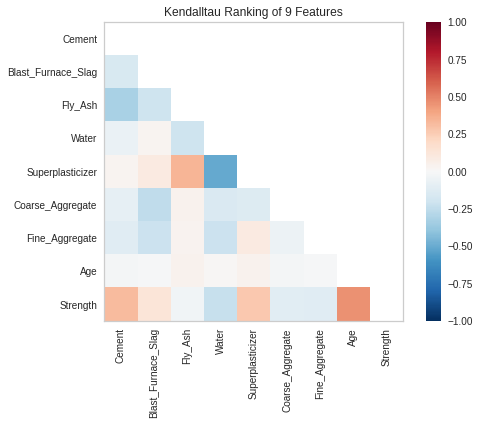

In [37]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

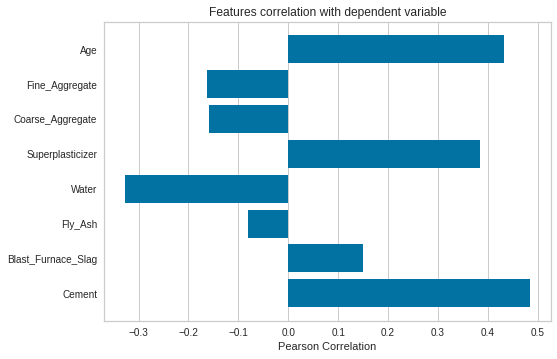

In [38]:
feature_correlation(X, y);

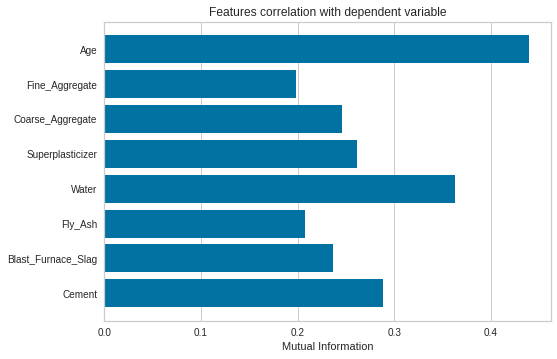

In [39]:
feature_correlation(X, y, method='mutual_info-regression');

#### Feature importance (a priori)

##### According to decision tree

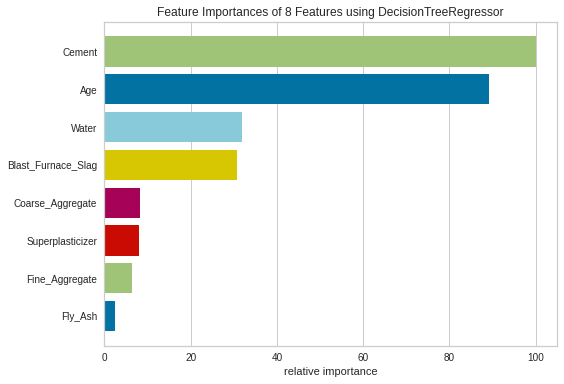

In [40]:
feature_importances(DecisionTreeRegressor(), X, y);

##### According to elasticnet regression

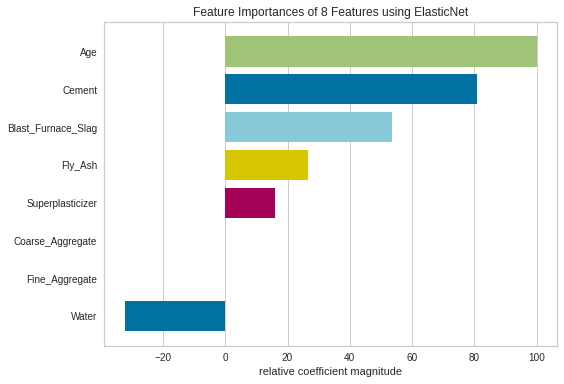

In [41]:
feature_importances(ElasticNet(alpha=0.01, l1_ratio=0.5), X, y);

#### Check columns that should be dropped

In [42]:
print(dropped_cols)

[]


## Splittings 

In [43]:
df = df_copy

#### Splitting dataframe in features and targets

In [44]:
y = df[target_col]

In [45]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [46]:
nb_features = len(X.columns.tolist())

In [47]:
nb_targets = 1

In [48]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [49]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [50]:
cat_selector = make_column_selector(dtype_include=object)

In [51]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [52]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), Decorrelator(threshold_corr))

In [53]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), Decorrelator(threshold_corr))

In [54]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

##### For models not based on tree

In [55]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False), Decorrelator(threshold_corr))

In [56]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler(), Decorrelator(threshold_corr))

In [57]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

##### Keras neural network definition

In [58]:
def K_Regre(): 
    keras.backend.clear_session()
#   neural network architecture: start  
    model = Sequential() 
    model.add(Dense(layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.2)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.2)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(1)) 
#   neural network architecture: end   
    model.compile(loss='mean_squared_error', optimizer='adam') 
    return model


##### Early Stopping

In [59]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

In [60]:
set_config(display='diagram') 
ntree_preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True)),
                                                 ('standardscaler',
                                                  StandardScaler()),
                                                 ('decorrelator',
                                                  Decorrelator(threshold=0.95))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2cd77972b0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('decorrelator',
                                                  Decorrelator(threshold=0.95))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2cd778bf40>)])

In [61]:
K_R = KerasRegressor(K_Regre,batch_size=64, epochs=2000, callbacks=[es],validation_data=(ntree_preprocessor.transform(X_test), y_test), verbose=1) 
K_R._estimator_type = 'regressor'

##### Level-0 models

In [62]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('DTR', make_pipeline(tree_preprocessor, DecisionTreeRegressor(max_depth=5))), 
          ('RFR', make_pipeline(tree_preprocessor, RandomForestRegressor(max_depth=5, n_estimators=10, max_features='auto'))), 
          ('ABR', make_pipeline(tree_preprocessor, AdaBoostRegressor())), 
          ('HGBR', make_pipeline(tree_preprocessor, HistGradientBoostingRegressor(early_stopping=True))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.5))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNR', make_pipeline(ntree_preprocessor, KNeighborsRegressor())), 
          ('KERR', make_pipeline(ntree_preprocessor, K_R)), 
          ]

##### Level-1 model

In [63]:
level_1 = ElasticNetCV(cv=5)

##### Stacking for regression

In [64]:
model = StackingRegressor(level_0, final_estimator=level_1)

### Model fitting

In [65]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

Epoch 1/2000
11/11 [==============================] - 2s 36ms/step - loss: 1549.2822 - val_loss: 1576.1467
Epoch 2/2000
11/11 [==============================] - 0s 13ms/step - loss: 1541.9565 - val_loss: 1574.4198
Epoch 3/2000
11/11 [==============================] - 0s 13ms/step - loss: 1535.0469 - val_loss: 1572.2190
Epoch 4/2000
11/11 [==============================] - 0s 14ms/step - loss: 1527.5300 - val_loss: 1569.1849
Epoch 5/2000
11/11 [==============================] - 0s 14ms/step - loss: 1522.6790 - val_loss: 1565.3986
Epoch 6/2000
11/11 [==============================] - 0s 13ms/step - loss: 1512.9961 - val_loss: 1561.0048
Epoch 7/2000
11/11 [==============================] - 0s 13ms/step - loss: 1507.9194 - val_loss: 1555.7803
Epoch 8/2000
11/11 [==============================] - 0s 13ms/step - loss: 1494.3013 - val_loss: 1549.8368
Epoch 9/2000
11/11 [==============================] - 0s 14ms/step - loss: 1490.1018 - val_loss: 1543.1725
Epoch 10/2000
11/11 [================

11/11 [==============================] - 0s 12ms/step - loss: 485.2948 - val_loss: 420.9114
Epoch 78/2000
11/11 [==============================] - 0s 13ms/step - loss: 474.4393 - val_loss: 408.0408
Epoch 79/2000
11/11 [==============================] - 0s 13ms/step - loss: 459.5344 - val_loss: 396.1751
Epoch 80/2000
11/11 [==============================] - 0s 13ms/step - loss: 442.5265 - val_loss: 383.3991
Epoch 81/2000
11/11 [==============================] - 0s 13ms/step - loss: 427.7304 - val_loss: 370.1089
Epoch 82/2000
11/11 [==============================] - 0s 12ms/step - loss: 414.0389 - val_loss: 360.6176
Epoch 83/2000
11/11 [==============================] - 0s 14ms/step - loss: 406.3936 - val_loss: 352.8336
Epoch 84/2000
11/11 [==============================] - 0s 12ms/step - loss: 403.4073 - val_loss: 340.9292
Epoch 85/2000
11/11 [==============================] - 0s 12ms/step - loss: 387.5663 - val_loss: 331.6223
Epoch 86/2000
11/11 [==============================] - 0s 11

11/11 [==============================] - 0s 13ms/step - loss: 94.5663 - val_loss: 49.7936
Epoch 155/2000
11/11 [==============================] - 0s 13ms/step - loss: 84.6177 - val_loss: 49.2599
Epoch 156/2000
11/11 [==============================] - 0s 11ms/step - loss: 95.9132 - val_loss: 49.5145
Epoch 157/2000
11/11 [==============================] - 0s 15ms/step - loss: 92.7088 - val_loss: 49.8952
Epoch 158/2000
11/11 [==============================] - 0s 9ms/step - loss: 84.1267 - val_loss: 49.2801
Epoch 159/2000
11/11 [==============================] - 0s 16ms/step - loss: 81.2578 - val_loss: 49.1143
Epoch 160/2000
11/11 [==============================] - 0s 12ms/step - loss: 88.9380 - val_loss: 47.9712
Epoch 161/2000
11/11 [==============================] - 0s 14ms/step - loss: 96.8574 - val_loss: 47.1626
Epoch 162/2000
11/11 [==============================] - 0s 12ms/step - loss: 79.3547 - val_loss: 47.5466
Epoch 163/2000
11/11 [==============================] - 0s 12ms/step - 

11/11 [==============================] - 0s 14ms/step - loss: 90.7674 - val_loss: 43.4417
Epoch 233/2000
11/11 [==============================] - 0s 13ms/step - loss: 86.0929 - val_loss: 43.7748
Epoch 234/2000
11/11 [==============================] - 0s 12ms/step - loss: 85.6608 - val_loss: 43.8499
Epoch 235/2000
11/11 [==============================] - 0s 13ms/step - loss: 76.4712 - val_loss: 43.7853
Epoch 236/2000
11/11 [==============================] - 0s 12ms/step - loss: 79.5426 - val_loss: 44.2169
Epoch 237/2000
11/11 [==============================] - 0s 14ms/step - loss: 84.2884 - val_loss: 43.7105
Epoch 238/2000
11/11 [==============================] - 0s 13ms/step - loss: 85.3430 - val_loss: 44.0035
Epoch 239/2000
11/11 [==============================] - 0s 13ms/step - loss: 92.7498 - val_loss: 44.1715
Epoch 240/2000
11/11 [==============================] - 0s 12ms/step - loss: 81.5152 - val_loss: 43.8937
Epoch 241/2000
11/11 [==============================] - 0s 13ms/step -

9/9 [==============================] - 0s 14ms/step - loss: 1173.9315 - val_loss: 1144.3163
Epoch 42/2000
9/9 [==============================] - 0s 13ms/step - loss: 1159.1399 - val_loss: 1128.6251
Epoch 43/2000
9/9 [==============================] - 0s 13ms/step - loss: 1146.4836 - val_loss: 1112.4056
Epoch 44/2000
9/9 [==============================] - 0s 15ms/step - loss: 1134.6366 - val_loss: 1094.5647
Epoch 45/2000
9/9 [==============================] - 0s 12ms/step - loss: 1106.5042 - val_loss: 1079.3145
Epoch 46/2000
9/9 [==============================] - 0s 15ms/step - loss: 1090.0120 - val_loss: 1065.1617
Epoch 47/2000
9/9 [==============================] - 0s 12ms/step - loss: 1076.1643 - val_loss: 1050.2921
Epoch 48/2000
9/9 [==============================] - 0s 13ms/step - loss: 1068.2948 - val_loss: 1035.8287
Epoch 49/2000
9/9 [==============================] - 0s 15ms/step - loss: 1068.2629 - val_loss: 1018.5356
Epoch 50/2000
9/9 [==============================] - 0s 11ms

9/9 [==============================] - 0s 16ms/step - loss: 273.5079 - val_loss: 208.2650
Epoch 120/2000
9/9 [==============================] - 0s 13ms/step - loss: 258.6371 - val_loss: 202.1064
Epoch 121/2000
9/9 [==============================] - 0s 11ms/step - loss: 240.8667 - val_loss: 197.3253
Epoch 122/2000
9/9 [==============================] - 0s 15ms/step - loss: 228.2070 - val_loss: 191.8742
Epoch 123/2000
9/9 [==============================] - 0s 15ms/step - loss: 238.7718 - val_loss: 186.1980
Epoch 124/2000
9/9 [==============================] - 0s 15ms/step - loss: 231.7810 - val_loss: 180.9902
Epoch 125/2000
9/9 [==============================] - 0s 15ms/step - loss: 225.8224 - val_loss: 173.5435
Epoch 126/2000
9/9 [==============================] - 0s 13ms/step - loss: 214.2088 - val_loss: 167.8882
Epoch 127/2000
9/9 [==============================] - 0s 13ms/step - loss: 220.0973 - val_loss: 163.4763
Epoch 128/2000
9/9 [==============================] - 0s 16ms/step - l

Epoch 198/2000
9/9 [==============================] - 0s 12ms/step - loss: 89.1993 - val_loss: 49.2076
Epoch 199/2000
9/9 [==============================] - 0s 14ms/step - loss: 85.0416 - val_loss: 50.2064
Epoch 200/2000
9/9 [==============================] - 0s 12ms/step - loss: 86.1693 - val_loss: 50.5165
Epoch 201/2000
9/9 [==============================] - 0s 17ms/step - loss: 82.6668 - val_loss: 50.3778
Epoch 202/2000
9/9 [==============================] - 0s 11ms/step - loss: 85.7599 - val_loss: 50.2528
Epoch 203/2000
9/9 [==============================] - 0s 16ms/step - loss: 81.5984 - val_loss: 50.3132
Epoch 204/2000
9/9 [==============================] - 0s 15ms/step - loss: 84.7540 - val_loss: 50.9989
Epoch 205/2000
9/9 [==============================] - 0s 13ms/step - loss: 85.5210 - val_loss: 50.8035
Epoch 206/2000
9/9 [==============================] - 0s 11ms/step - loss: 77.0371 - val_loss: 49.8598
Epoch 207/2000
9/9 [==============================] - 0s 16ms/step - loss

9/9 [==============================] - 0s 13ms/step - loss: 1513.7002 - val_loss: 1518.5791
Epoch 9/2000
9/9 [==============================] - 0s 13ms/step - loss: 1510.4509 - val_loss: 1514.2268
Epoch 10/2000
9/9 [==============================] - 0s 13ms/step - loss: 1503.3445 - val_loss: 1509.5994
Epoch 11/2000
9/9 [==============================] - 0s 17ms/step - loss: 1500.4336 - val_loss: 1504.5449
Epoch 12/2000
9/9 [==============================] - 0s 15ms/step - loss: 1490.5990 - val_loss: 1499.3350
Epoch 13/2000
9/9 [==============================] - 0s 16ms/step - loss: 1483.1107 - val_loss: 1492.8054
Epoch 14/2000
9/9 [==============================] - 0s 12ms/step - loss: 1479.4823 - val_loss: 1485.9956
Epoch 15/2000
9/9 [==============================] - 0s 15ms/step - loss: 1468.0604 - val_loss: 1478.9299
Epoch 16/2000
9/9 [==============================] - 0s 13ms/step - loss: 1465.1783 - val_loss: 1471.6715
Epoch 17/2000
9/9 [==============================] - 0s 13ms/

9/9 [==============================] - 0s 16ms/step - loss: 561.4873 - val_loss: 460.4880
Epoch 87/2000
9/9 [==============================] - 0s 16ms/step - loss: 551.4901 - val_loss: 450.6573
Epoch 88/2000
9/9 [==============================] - 0s 12ms/step - loss: 534.9301 - val_loss: 442.3022
Epoch 89/2000
9/9 [==============================] - 0s 16ms/step - loss: 519.8750 - val_loss: 437.0320
Epoch 90/2000
9/9 [==============================] - 0s 12ms/step - loss: 530.8256 - val_loss: 434.3705
Epoch 91/2000
9/9 [==============================] - 0s 16ms/step - loss: 505.7611 - val_loss: 427.0334
Epoch 92/2000
9/9 [==============================] - 0s 12ms/step - loss: 495.6690 - val_loss: 420.5038
Epoch 93/2000
9/9 [==============================] - 0s 13ms/step - loss: 493.3471 - val_loss: 421.9197
Epoch 94/2000
9/9 [==============================] - 0s 15ms/step - loss: 446.7266 - val_loss: 420.5571
Epoch 95/2000
9/9 [==============================] - 0s 16ms/step - loss: 464.

9/9 [==============================] - 0s 15ms/step - loss: 107.8564 - val_loss: 68.0556
Epoch 165/2000
9/9 [==============================] - 0s 16ms/step - loss: 113.0800 - val_loss: 67.3642
Epoch 166/2000
9/9 [==============================] - 0s 16ms/step - loss: 110.6043 - val_loss: 66.9679
Epoch 167/2000
9/9 [==============================] - 0s 12ms/step - loss: 108.3077 - val_loss: 66.8799
Epoch 168/2000
9/9 [==============================] - 0s 15ms/step - loss: 110.9603 - val_loss: 66.8889
Epoch 169/2000
9/9 [==============================] - 0s 16ms/step - loss: 103.6230 - val_loss: 66.5924
Epoch 170/2000
9/9 [==============================] - 0s 15ms/step - loss: 114.8827 - val_loss: 65.8240
Epoch 171/2000
9/9 [==============================] - 0s 12ms/step - loss: 116.5521 - val_loss: 64.6251
Epoch 172/2000
9/9 [==============================] - 0s 11ms/step - loss: 110.2730 - val_loss: 62.4605
Epoch 173/2000
9/9 [==============================] - 0s 15ms/step - loss: 111.

9/9 [==============================] - 0s 13ms/step - loss: 84.7292 - val_loss: 45.4278
Epoch 244/2000
9/9 [==============================] - 0s 14ms/step - loss: 86.8756 - val_loss: 45.3497
Epoch 245/2000
9/9 [==============================] - 0s 17ms/step - loss: 94.5095 - val_loss: 44.5059
Epoch 246/2000
9/9 [==============================] - 0s 15ms/step - loss: 97.6860 - val_loss: 44.2744
Epoch 247/2000
9/9 [==============================] - 0s 16ms/step - loss: 98.1252 - val_loss: 44.5422
Epoch 248/2000
9/9 [==============================] - 0s 12ms/step - loss: 91.5338 - val_loss: 44.3860
Epoch 249/2000
9/9 [==============================] - 0s 13ms/step - loss: 93.2266 - val_loss: 44.6322
Epoch 250/2000
9/9 [==============================] - 0s 14ms/step - loss: 89.8916 - val_loss: 44.1458
Epoch 251/2000
9/9 [==============================] - 0s 13ms/step - loss: 89.3456 - val_loss: 43.9710
Epoch 252/2000
9/9 [==============================] - 0s 11ms/step - loss: 103.7463 - va

9/9 [==============================] - 0s 11ms/step - loss: 1233.8020 - val_loss: 1204.2592
Epoch 36/2000
9/9 [==============================] - 0s 15ms/step - loss: 1214.8976 - val_loss: 1192.3003
Epoch 37/2000
9/9 [==============================] - 0s 16ms/step - loss: 1200.6443 - val_loss: 1180.8838
Epoch 38/2000
9/9 [==============================] - 0s 15ms/step - loss: 1198.4637 - val_loss: 1166.5222
Epoch 39/2000
9/9 [==============================] - 0s 18ms/step - loss: 1169.0133 - val_loss: 1149.9353
Epoch 40/2000
9/9 [==============================] - 0s 12ms/step - loss: 1161.1107 - val_loss: 1132.1736
Epoch 41/2000
9/9 [==============================] - 0s 18ms/step - loss: 1144.8202 - val_loss: 1116.7740
Epoch 42/2000
9/9 [==============================] - 0s 16ms/step - loss: 1131.6443 - val_loss: 1099.1627
Epoch 43/2000
9/9 [==============================] - 0s 14ms/step - loss: 1141.5234 - val_loss: 1085.1191
Epoch 44/2000
9/9 [==============================] - 0s 16ms

9/9 [==============================] - 0s 16ms/step - loss: 330.5702 - val_loss: 252.2178
Epoch 114/2000
9/9 [==============================] - 0s 14ms/step - loss: 314.3329 - val_loss: 243.2954
Epoch 115/2000
9/9 [==============================] - 0s 18ms/step - loss: 317.2771 - val_loss: 235.6585
Epoch 116/2000
9/9 [==============================] - 0s 12ms/step - loss: 317.3650 - val_loss: 229.6175
Epoch 117/2000
9/9 [==============================] - 0s 13ms/step - loss: 295.7977 - val_loss: 224.4583
Epoch 118/2000
9/9 [==============================] - 0s 15ms/step - loss: 304.6077 - val_loss: 219.6788
Epoch 119/2000
9/9 [==============================] - 0s 10ms/step - loss: 285.0426 - val_loss: 214.4794
Epoch 120/2000
9/9 [==============================] - 0s 15ms/step - loss: 281.0063 - val_loss: 211.1349
Epoch 121/2000
9/9 [==============================] - 0s 15ms/step - loss: 269.0390 - val_loss: 206.6450
Epoch 122/2000
9/9 [==============================] - 0s 16ms/step - l

9/9 [==============================] - 0s 11ms/step - loss: 95.4078 - val_loss: 48.6528
Epoch 192/2000
9/9 [==============================] - 0s 13ms/step - loss: 95.3061 - val_loss: 48.1840
Epoch 193/2000
9/9 [==============================] - 0s 12ms/step - loss: 101.4808 - val_loss: 48.1699
Epoch 194/2000
9/9 [==============================] - 0s 17ms/step - loss: 93.0148 - val_loss: 48.2835
Epoch 195/2000
9/9 [==============================] - 0s 15ms/step - loss: 106.0874 - val_loss: 48.6390
Epoch 196/2000
9/9 [==============================] - 0s 17ms/step - loss: 103.8547 - val_loss: 48.7158
Epoch 197/2000
9/9 [==============================] - 0s 13ms/step - loss: 93.6714 - val_loss: 48.5988
Epoch 198/2000
9/9 [==============================] - 0s 16ms/step - loss: 100.0364 - val_loss: 48.4012
Epoch 199/2000
9/9 [==============================] - 0s 15ms/step - loss: 96.5930 - val_loss: 48.7321
Epoch 200/2000
9/9 [==============================] - 0s 16ms/step - loss: 103.4766 

9/9 [==============================] - 0s 21ms/step - loss: 1423.6130 - val_loss: 1466.5052
Epoch 19/2000
9/9 [==============================] - 0s 18ms/step - loss: 1415.2161 - val_loss: 1456.5642
Epoch 20/2000
9/9 [==============================] - 0s 15ms/step - loss: 1406.8496 - val_loss: 1445.9902
Epoch 21/2000
9/9 [==============================] - 0s 15ms/step - loss: 1401.6841 - val_loss: 1432.8685
Epoch 22/2000
9/9 [==============================] - 0s 15ms/step - loss: 1390.4106 - val_loss: 1418.9270
Epoch 23/2000
9/9 [==============================] - 0s 16ms/step - loss: 1383.2904 - val_loss: 1407.1865
Epoch 24/2000
9/9 [==============================] - 0s 15ms/step - loss: 1368.1666 - val_loss: 1395.0073
Epoch 25/2000
9/9 [==============================] - 0s 16ms/step - loss: 1359.4559 - val_loss: 1380.3138
Epoch 26/2000
9/9 [==============================] - 0s 16ms/step - loss: 1353.9155 - val_loss: 1365.9019
Epoch 27/2000
9/9 [==============================] - 0s 15ms

9/9 [==============================] - 0s 13ms/step - loss: 479.1552 - val_loss: 405.9733
Epoch 97/2000
9/9 [==============================] - 0s 13ms/step - loss: 451.1744 - val_loss: 396.0371
Epoch 98/2000
9/9 [==============================] - 0s 12ms/step - loss: 469.1252 - val_loss: 387.9109
Epoch 99/2000
9/9 [==============================] - 0s 12ms/step - loss: 434.3506 - val_loss: 380.3660
Epoch 100/2000
9/9 [==============================] - 0s 16ms/step - loss: 411.3240 - val_loss: 374.3384
Epoch 101/2000
9/9 [==============================] - 0s 13ms/step - loss: 428.4022 - val_loss: 371.4910
Epoch 102/2000
9/9 [==============================] - 0s 13ms/step - loss: 407.5796 - val_loss: 364.8016
Epoch 103/2000
9/9 [==============================] - 0s 15ms/step - loss: 397.2935 - val_loss: 353.3012
Epoch 104/2000
9/9 [==============================] - 0s 16ms/step - loss: 410.1123 - val_loss: 345.0930
Epoch 105/2000
9/9 [==============================] - 0s 13ms/step - loss

9/9 [==============================] - 0s 20ms/step - loss: 109.3651 - val_loss: 65.7054
Epoch 175/2000
9/9 [==============================] - 0s 16ms/step - loss: 103.5383 - val_loss: 66.2199
Epoch 176/2000
9/9 [==============================] - 0s 19ms/step - loss: 98.7041 - val_loss: 65.4032
Epoch 177/2000
9/9 [==============================] - 0s 15ms/step - loss: 93.3808 - val_loss: 64.6976
Epoch 178/2000
9/9 [==============================] - 0s 15ms/step - loss: 99.5684 - val_loss: 63.7073
Epoch 179/2000
9/9 [==============================] - 0s 18ms/step - loss: 102.5111 - val_loss: 62.3930
Epoch 180/2000
9/9 [==============================] - 0s 15ms/step - loss: 101.9589 - val_loss: 61.4682
Epoch 181/2000
9/9 [==============================] - 0s 13ms/step - loss: 98.7346 - val_loss: 59.6636
Epoch 182/2000
9/9 [==============================] - 0s 17ms/step - loss: 98.5191 - val_loss: 57.6946
Epoch 183/2000
9/9 [==============================] - 0s 16ms/step - loss: 107.0461 

9/9 [==============================] - 0s 15ms/step - loss: 93.7115 - val_loss: 44.7111
Epoch 254/2000
9/9 [==============================] - 0s 16ms/step - loss: 93.0871 - val_loss: 45.1755
Epoch 255/2000
9/9 [==============================] - 0s 16ms/step - loss: 85.0014 - val_loss: 44.6494
Epoch 256/2000
9/9 [==============================] - 0s 15ms/step - loss: 90.9101 - val_loss: 44.1972
Epoch 257/2000
9/9 [==============================] - 0s 18ms/step - loss: 110.9287 - val_loss: 44.3246
Epoch 258/2000
9/9 [==============================] - 0s 15ms/step - loss: 87.8281 - val_loss: 44.9585
Epoch 259/2000
9/9 [==============================] - 0s 16ms/step - loss: 81.0091 - val_loss: 45.1336
Epoch 260/2000
9/9 [==============================] - 0s 15ms/step - loss: 80.8958 - val_loss: 45.0595
Epoch 261/2000
9/9 [==============================] - 0s 13ms/step - loss: 105.2494 - val_loss: 44.3620
Epoch 262/2000
9/9 [==============================] - 0s 16ms/step - loss: 95.2974 - v

9/9 [==============================] - 0s 17ms/step - loss: 843.7973 - val_loss: 831.6639
Epoch 63/2000
9/9 [==============================] - 0s 12ms/step - loss: 824.2763 - val_loss: 820.4642
Epoch 64/2000
9/9 [==============================] - 0s 13ms/step - loss: 805.3350 - val_loss: 809.1721
Epoch 65/2000
9/9 [==============================] - 0s 15ms/step - loss: 803.3065 - val_loss: 796.2109
Epoch 66/2000
9/9 [==============================] - 0s 16ms/step - loss: 788.5023 - val_loss: 780.2818
Epoch 67/2000
9/9 [==============================] - 0s 13ms/step - loss: 772.2784 - val_loss: 766.9755
Epoch 68/2000
9/9 [==============================] - 0s 17ms/step - loss: 762.2484 - val_loss: 748.3442
Epoch 69/2000
9/9 [==============================] - 0s 15ms/step - loss: 751.1996 - val_loss: 734.6185
Epoch 70/2000
9/9 [==============================] - 0s 16ms/step - loss: 747.6200 - val_loss: 719.8981
Epoch 71/2000
9/9 [==============================] - 0s 15ms/step - loss: 730.

9/9 [==============================] - 0s 15ms/step - loss: 171.2068 - val_loss: 126.4882
Epoch 141/2000
9/9 [==============================] - 0s 14ms/step - loss: 154.4044 - val_loss: 125.4033
Epoch 142/2000
9/9 [==============================] - 0s 12ms/step - loss: 157.3883 - val_loss: 123.4968
Epoch 143/2000
9/9 [==============================] - 0s 13ms/step - loss: 154.1695 - val_loss: 121.0444
Epoch 144/2000
9/9 [==============================] - 0s 15ms/step - loss: 155.4356 - val_loss: 118.0903
Epoch 145/2000
9/9 [==============================] - 0s 17ms/step - loss: 145.3758 - val_loss: 114.6937
Epoch 146/2000
9/9 [==============================] - 0s 13ms/step - loss: 142.6800 - val_loss: 111.0020
Epoch 147/2000
9/9 [==============================] - 0s 16ms/step - loss: 147.7602 - val_loss: 108.7075
Epoch 148/2000
9/9 [==============================] - 0s 15ms/step - loss: 139.1144 - val_loss: 108.7866
Epoch 149/2000
9/9 [==============================] - 0s 16ms/step - l

9/9 [==============================] - 0s 15ms/step - loss: 88.9783 - val_loss: 54.0746
Epoch 220/2000
9/9 [==============================] - 0s 17ms/step - loss: 96.9329 - val_loss: 54.3408
Epoch 221/2000
9/9 [==============================] - 0s 16ms/step - loss: 88.3207 - val_loss: 54.3386
Epoch 222/2000
9/9 [==============================] - 0s 15ms/step - loss: 88.1022 - val_loss: 55.0191
Epoch 223/2000
9/9 [==============================] - 0s 11ms/step - loss: 92.9819 - val_loss: 55.3707
Epoch 224/2000
9/9 [==============================] - 0s 11ms/step - loss: 86.8606 - val_loss: 55.6989
Epoch 225/2000
9/9 [==============================] - 0s 13ms/step - loss: 107.5333 - val_loss: 54.9355
Epoch 226/2000
9/9 [==============================] - 0s 16ms/step - loss: 90.4460 - val_loss: 54.2285
Epoch 227/2000
9/9 [==============================] - 0s 11ms/step - loss: 87.5691 - val_loss: 54.2329
Epoch 228/2000
9/9 [==============================] - 0s 11ms/step - loss: 89.2153 - va

9/9 [==============================] - 0s 12ms/step - loss: 96.9362 - val_loss: 50.6119
Epoch 299/2000
9/9 [==============================] - 0s 13ms/step - loss: 84.3924 - val_loss: 50.4530
Epoch 300/2000
9/9 [==============================] - 0s 13ms/step - loss: 83.5220 - val_loss: 50.0697
Epoch 301/2000
9/9 [==============================] - 0s 15ms/step - loss: 82.6156 - val_loss: 50.1523
Epoch 302/2000
9/9 [==============================] - 0s 16ms/step - loss: 89.2196 - val_loss: 50.1273
Epoch 303/2000
9/9 [==============================] - 0s 12ms/step - loss: 99.6442 - val_loss: 49.6638
Epoch 304/2000
9/9 [==============================] - 0s 12ms/step - loss: 85.4515 - val_loss: 49.7247
Epoch 305/2000
9/9 [==============================] - 0s 15ms/step - loss: 87.6887 - val_loss: 50.1504
Epoch 306/2000
9/9 [==============================] - 0s 11ms/step - loss: 93.3797 - val_loss: 50.0290
Epoch 307/2000
9/9 [==============================] - 0s 12ms/step - loss: 93.2272 - val

StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleImputer(add_indicator=True)),
                                                                                                 ('standardscaler',
                                                                                                  StandardScaler()),
                                                                                                 ('decorrelator',
                                                                                                  Decorrelator(threshold=0.95))]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2cd77972...
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('onehotencoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                                sparse=False)),
                                                                                                 ('decorrelator',
                                                                                                  Decorrelator(threshold=0.95))]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2cd778bf40>)])),
                                               ('kerasregressor',
                                                <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f2cd7731f10>)]))],
                  final_estimator=ElasticNetCV(cv=5))

### Model evaluation

#### Model scoring

6/6 [==============================] - 0s 3ms/step


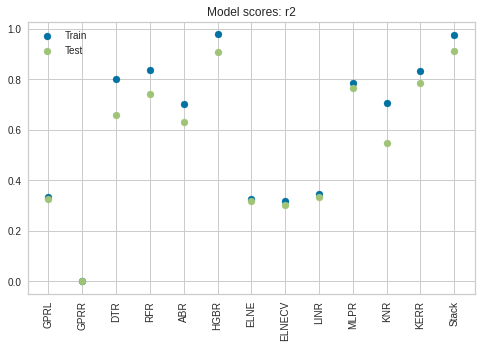

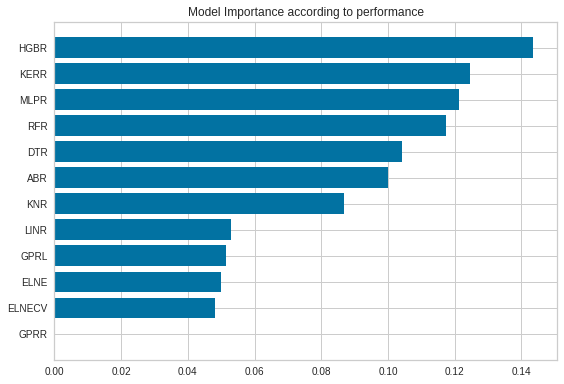

In [66]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

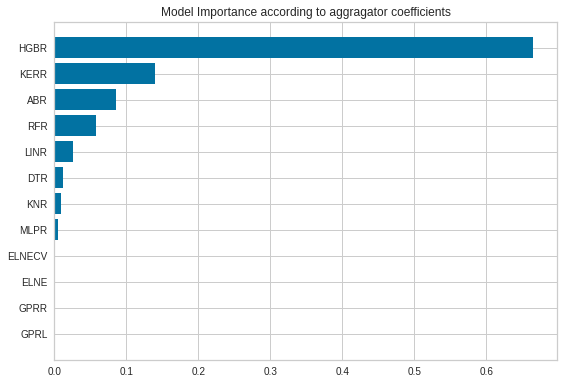

In [67]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

6/6 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: ram://fd8e2dad-bb9f-458f-a656-8a4d37d79546/assets
INFO:tensorflow:Assets written to: ram://6d338e72-388f-40be-a59e-ce4cdc16c602/assets
INFO:tensorflow:Assets written to: ram://413df9dd-72e4-413f-a1d0-011603c1d18d/assets
INFO:tensorflow:Assets written to: ram://26775566-2362-4a31-999b-ec2ca4a1d67f/assets
INFO:tensorflow:Assets written to: ram://77414f8d-8436-4a19-916d-77d3e1477dd2/assets
INFO:tensorflow:Assets written to: ram://9ab99762-f4ef-43bc-a6f8-b67d4fed0942/assets
INFO:tensorflow:Assets written to: ram://5291603c-a07a-4bb0-8f80-ab2b58987d03/assets
INFO:tensorflow:Assets written to: ram://538522f7-ba56-4fda-b653-33f444d63b93/assets


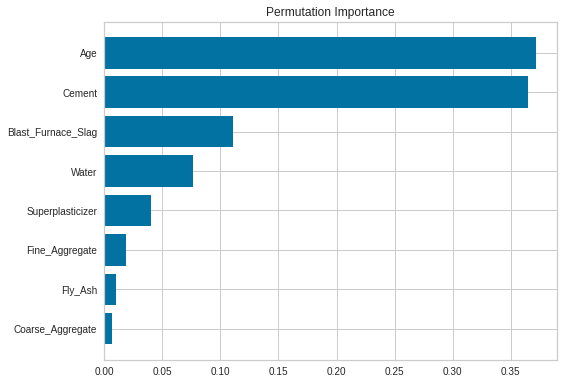

array([['Coarse_Aggregate', 0.006911233925934861],
       ['Fly_Ash', 0.010255780059874871],
       ['Fine_Aggregate', 0.018778467611575637],
       ['Superplasticizer', 0.040615632227055845],
       ['Water', 0.07615983490796153],
       ['Blast_Furnace_Slag', 0.11082435047314916],
       ['Cement', 0.364887836272202],
       ['Age', 0.37156686452224613]], dtype=object)

In [68]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [69]:
features_of_interest = []

INFO:tensorflow:Assets written to: ram://605f57b5-66af-4101-97d7-d6fd96ebd1ee/assets
INFO:tensorflow:Assets written to: ram://40766bc7-ea22-4472-a232-08c46cbd59d6/assets
INFO:tensorflow:Assets written to: ram://02dbee63-3e0d-4d4c-802b-2d0351666caa/assets
INFO:tensorflow:Assets written to: ram://c7916f27-60df-41bd-8e63-0ad7db559c54/assets
INFO:tensorflow:Assets written to: ram://9ebb9a0b-008b-4dd7-8406-90099f480e0d/assets
INFO:tensorflow:Assets written to: ram://7aadbbef-9000-4d1b-b87d-f51e4bbe09f4/assets
INFO:tensorflow:Assets written to: ram://bde6775c-8805-406e-8785-433d5970c175/assets
INFO:tensorflow:Assets written to: ram://2483fd61-88fd-4097-bba9-b312b98acf49/assets


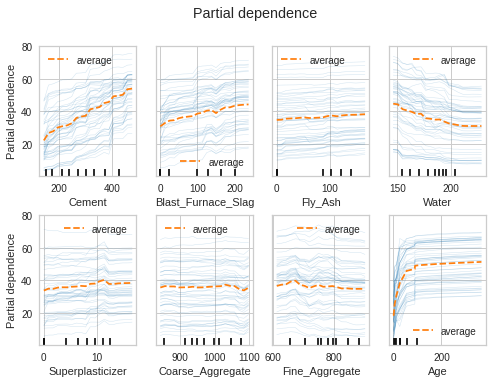

In [70]:
plot_partial_dependence(model, X_train, features_of_interest)

#### Residuals plot

6/6 [==============================] - 0s 2ms/step


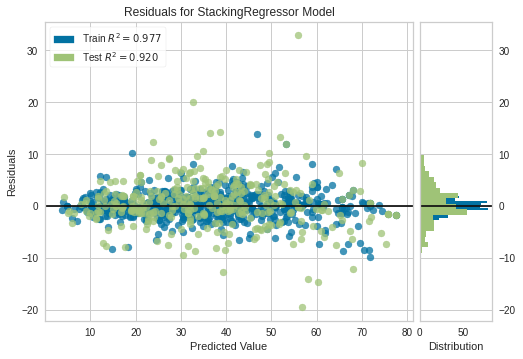

In [71]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Prediction error

6/6 [==============================] - 0s 3ms/step


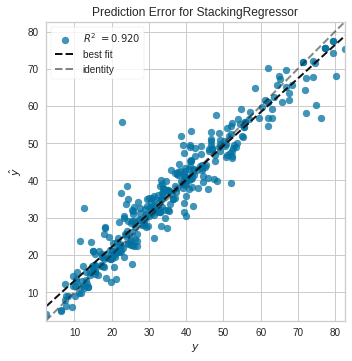

In [72]:
prediction_error(model, X_train, y_train, X_test, y_test);

### Final Model

In [73]:
threshold_model = 5

In [74]:
threshold_score = 0.5

##### Filtered Level-0 models

In [75]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [76]:
level_1 = ElasticNetCV(cv=5)

##### Build final model

In [77]:
model = StackingRegressor(level_0_f, final_estimator=level_1)

### Final Model fitting

In [78]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

Epoch 1/2000
11/11 [==============================] - 1s 28ms/step - loss: 1551.5452 - val_loss: 1555.5298
Epoch 2/2000
11/11 [==============================] - 0s 12ms/step - loss: 1547.7058 - val_loss: 1553.7882
Epoch 3/2000
11/11 [==============================] - 0s 13ms/step - loss: 1541.4655 - val_loss: 1551.5898
Epoch 4/2000
11/11 [==============================] - 0s 13ms/step - loss: 1535.9038 - val_loss: 1549.5087
Epoch 5/2000
11/11 [==============================] - 0s 13ms/step - loss: 1529.2051 - val_loss: 1546.4561
Epoch 6/2000
11/11 [==============================] - 0s 12ms/step - loss: 1519.2262 - val_loss: 1542.5887
Epoch 7/2000
11/11 [==============================] - 0s 14ms/step - loss: 1516.5226 - val_loss: 1538.7479
Epoch 8/2000
11/11 [==============================] - 0s 11ms/step - loss: 1511.9680 - val_loss: 1533.8368
Epoch 9/2000
11/11 [==============================] - 0s 13ms/step - loss: 1508.7368 - val_loss: 1528.0623
Epoch 10/2000
11/11 [================

11/11 [==============================] - 0s 13ms/step - loss: 501.9880 - val_loss: 437.7345
Epoch 78/2000
11/11 [==============================] - 0s 12ms/step - loss: 485.0955 - val_loss: 429.2892
Epoch 79/2000
11/11 [==============================] - 0s 14ms/step - loss: 478.6994 - val_loss: 419.3545
Epoch 80/2000
11/11 [==============================] - 0s 12ms/step - loss: 471.6697 - val_loss: 411.2233
Epoch 81/2000
11/11 [==============================] - 0s 13ms/step - loss: 449.3073 - val_loss: 401.0818
Epoch 82/2000
11/11 [==============================] - 0s 12ms/step - loss: 438.5813 - val_loss: 389.9091
Epoch 83/2000
11/11 [==============================] - 0s 12ms/step - loss: 421.4433 - val_loss: 377.1131
Epoch 84/2000
11/11 [==============================] - 0s 15ms/step - loss: 407.4835 - val_loss: 365.8385
Epoch 85/2000
11/11 [==============================] - 0s 12ms/step - loss: 414.4064 - val_loss: 353.0995
Epoch 86/2000
11/11 [==============================] - 0s 12

11/11 [==============================] - 0s 13ms/step - loss: 93.4578 - val_loss: 53.6656
Epoch 155/2000
11/11 [==============================] - 0s 12ms/step - loss: 96.1253 - val_loss: 53.2609
Epoch 156/2000
11/11 [==============================] - 0s 14ms/step - loss: 91.1409 - val_loss: 53.4946
Epoch 157/2000
11/11 [==============================] - 0s 14ms/step - loss: 91.5440 - val_loss: 53.1326
Epoch 158/2000
11/11 [==============================] - 0s 12ms/step - loss: 87.2772 - val_loss: 51.9636
Epoch 159/2000
11/11 [==============================] - 0s 12ms/step - loss: 89.7172 - val_loss: 50.7045
Epoch 160/2000
11/11 [==============================] - 0s 13ms/step - loss: 87.6381 - val_loss: 50.0741
Epoch 161/2000
11/11 [==============================] - 0s 13ms/step - loss: 90.7652 - val_loss: 50.0154
Epoch 162/2000
11/11 [==============================] - 0s 9ms/step - loss: 89.4912 - val_loss: 50.2185
Epoch 163/2000
11/11 [==============================] - 0s 13ms/step - 

11/11 [==============================] - 0s 13ms/step - loss: 86.1141 - val_loss: 44.9756
Epoch 233/2000
11/11 [==============================] - 0s 12ms/step - loss: 92.4988 - val_loss: 45.1791
Epoch 234/2000
11/11 [==============================] - 0s 13ms/step - loss: 87.0064 - val_loss: 45.2521
Epoch 235/2000
11/11 [==============================] - 0s 12ms/step - loss: 82.8062 - val_loss: 45.5107
Epoch 236/2000
11/11 [==============================] - 0s 13ms/step - loss: 89.2084 - val_loss: 45.8256
Epoch 237/2000
11/11 [==============================] - 0s 12ms/step - loss: 90.3922 - val_loss: 45.6927
Epoch 238/2000
11/11 [==============================] - 0s 13ms/step - loss: 94.9968 - val_loss: 44.9799
Epoch 239/2000
11/11 [==============================] - 0s 11ms/step - loss: 84.1506 - val_loss: 44.9739
Epoch 240/2000
11/11 [==============================] - 0s 13ms/step - loss: 86.1351 - val_loss: 45.3479
Epoch 241/2000
11/11 [==============================] - 0s 13ms/step -

9/9 [==============================] - 0s 17ms/step - loss: 891.8968 - val_loss: 804.7189
Epoch 63/2000
9/9 [==============================] - 0s 15ms/step - loss: 894.9868 - val_loss: 792.6682
Epoch 64/2000
9/9 [==============================] - 0s 19ms/step - loss: 875.5741 - val_loss: 780.9378
Epoch 65/2000
9/9 [==============================] - 0s 21ms/step - loss: 866.5369 - val_loss: 771.1783
Epoch 66/2000
9/9 [==============================] - 0s 17ms/step - loss: 843.6282 - val_loss: 761.8526
Epoch 67/2000
9/9 [==============================] - 0s 23ms/step - loss: 830.2559 - val_loss: 748.8792
Epoch 68/2000
9/9 [==============================] - 0s 16ms/step - loss: 818.8072 - val_loss: 739.2715
Epoch 69/2000
9/9 [==============================] - 0s 16ms/step - loss: 805.3027 - val_loss: 732.6559
Epoch 70/2000
9/9 [==============================] - 0s 17ms/step - loss: 777.3204 - val_loss: 725.0841
Epoch 71/2000
9/9 [==============================] - 0s 11ms/step - loss: 782.

9/9 [==============================] - 0s 14ms/step - loss: 172.4048 - val_loss: 145.1592
Epoch 141/2000
9/9 [==============================] - 0s 11ms/step - loss: 159.6747 - val_loss: 143.3493
Epoch 142/2000
9/9 [==============================] - 0s 15ms/step - loss: 157.8571 - val_loss: 140.1794
Epoch 143/2000
9/9 [==============================] - 0s 14ms/step - loss: 172.4992 - val_loss: 136.2121
Epoch 144/2000
9/9 [==============================] - 0s 16ms/step - loss: 157.2650 - val_loss: 130.9305
Epoch 145/2000
9/9 [==============================] - 0s 15ms/step - loss: 141.5013 - val_loss: 127.4539
Epoch 146/2000
9/9 [==============================] - 0s 19ms/step - loss: 160.0305 - val_loss: 125.0531
Epoch 147/2000
9/9 [==============================] - 0s 15ms/step - loss: 151.3384 - val_loss: 120.1461
Epoch 148/2000
9/9 [==============================] - 0s 15ms/step - loss: 140.2879 - val_loss: 118.9028
Epoch 149/2000
9/9 [==============================] - 0s 15ms/step - l

9/9 [==============================] - 0s 15ms/step - loss: 84.8036 - val_loss: 51.7075
Epoch 220/2000
9/9 [==============================] - 0s 11ms/step - loss: 86.2609 - val_loss: 51.7795
Epoch 221/2000
9/9 [==============================] - 0s 15ms/step - loss: 83.0201 - val_loss: 51.6747
Epoch 222/2000
9/9 [==============================] - 0s 15ms/step - loss: 94.7704 - val_loss: 50.9822
Epoch 223/2000
9/9 [==============================] - 0s 15ms/step - loss: 96.1157 - val_loss: 50.5339
Epoch 224/2000
9/9 [==============================] - 0s 13ms/step - loss: 92.0860 - val_loss: 50.5036
Epoch 225/2000
9/9 [==============================] - 0s 19ms/step - loss: 92.6717 - val_loss: 50.0618
Epoch 226/2000
9/9 [==============================] - 0s 18ms/step - loss: 84.2831 - val_loss: 49.9181
Epoch 227/2000
9/9 [==============================] - 0s 19ms/step - loss: 91.7024 - val_loss: 49.0893
Epoch 228/2000
9/9 [==============================] - 0s 15ms/step - loss: 99.8462 - val

9/9 [==============================] - 0s 12ms/step - loss: 1037.5684 - val_loss: 1008.9470
Epoch 49/2000
9/9 [==============================] - 0s 15ms/step - loss: 1011.3130 - val_loss: 990.6581
Epoch 50/2000
9/9 [==============================] - 0s 11ms/step - loss: 1015.4803 - val_loss: 975.6771
Epoch 51/2000
9/9 [==============================] - 0s 13ms/step - loss: 1006.6805 - val_loss: 952.8495
Epoch 52/2000
9/9 [==============================] - 0s 16ms/step - loss: 986.5936 - val_loss: 935.7234
Epoch 53/2000
9/9 [==============================] - 0s 10ms/step - loss: 969.9182 - val_loss: 919.0948
Epoch 54/2000
9/9 [==============================] - 0s 12ms/step - loss: 961.8668 - val_loss: 903.2001
Epoch 55/2000
9/9 [==============================] - 0s 12ms/step - loss: 950.7667 - val_loss: 885.3485
Epoch 56/2000
9/9 [==============================] - 0s 11ms/step - loss: 928.4205 - val_loss: 866.3612
Epoch 57/2000
9/9 [==============================] - 0s 15ms/step - loss:

9/9 [==============================] - 0s 17ms/step - loss: 219.3140 - val_loss: 205.8121
Epoch 127/2000
9/9 [==============================] - 0s 15ms/step - loss: 238.5886 - val_loss: 197.2168
Epoch 128/2000
9/9 [==============================] - 0s 15ms/step - loss: 225.1240 - val_loss: 192.6426
Epoch 129/2000
9/9 [==============================] - 0s 13ms/step - loss: 216.5215 - val_loss: 186.2918
Epoch 130/2000
9/9 [==============================] - 0s 15ms/step - loss: 207.2151 - val_loss: 182.7032
Epoch 131/2000
9/9 [==============================] - 0s 12ms/step - loss: 189.4787 - val_loss: 180.5222
Epoch 132/2000
9/9 [==============================] - 0s 15ms/step - loss: 184.4876 - val_loss: 173.9467
Epoch 133/2000
9/9 [==============================] - 0s 11ms/step - loss: 193.5877 - val_loss: 169.3372
Epoch 134/2000
9/9 [==============================] - 0s 12ms/step - loss: 173.5795 - val_loss: 161.3441
Epoch 135/2000
9/9 [==============================] - 0s 14ms/step - l

Epoch 205/2000
9/9 [==============================] - 0s 14ms/step - loss: 89.0538 - val_loss: 49.1961
Epoch 206/2000
9/9 [==============================] - 0s 15ms/step - loss: 85.9736 - val_loss: 48.4482
Epoch 207/2000
9/9 [==============================] - 0s 15ms/step - loss: 98.6091 - val_loss: 47.3989
Epoch 208/2000
9/9 [==============================] - 0s 15ms/step - loss: 80.1591 - val_loss: 47.4927
Epoch 209/2000
9/9 [==============================] - 0s 11ms/step - loss: 83.0133 - val_loss: 48.3207
Epoch 210/2000
9/9 [==============================] - 0s 12ms/step - loss: 84.2835 - val_loss: 48.6723
Epoch 211/2000
9/9 [==============================] - 0s 12ms/step - loss: 86.7073 - val_loss: 47.3568
Epoch 212/2000
9/9 [==============================] - 0s 12ms/step - loss: 92.2977 - val_loss: 47.1864
Epoch 213/2000
9/9 [==============================] - 0s 15ms/step - loss: 88.6562 - val_loss: 47.4735
Epoch 214/2000
9/9 [==============================] - 0s 12ms/step - loss

9/9 [==============================] - 0s 15ms/step - loss: 1588.3215 - val_loss: 1574.0575
Epoch 4/2000
9/9 [==============================] - 0s 15ms/step - loss: 1581.7048 - val_loss: 1569.9451
Epoch 5/2000
9/9 [==============================] - 0s 15ms/step - loss: 1576.6046 - val_loss: 1566.1791
Epoch 6/2000
9/9 [==============================] - 0s 13ms/step - loss: 1562.8029 - val_loss: 1562.2588
Epoch 7/2000
9/9 [==============================] - 0s 15ms/step - loss: 1563.3883 - val_loss: 1557.9957
Epoch 8/2000
9/9 [==============================] - 0s 15ms/step - loss: 1550.7933 - val_loss: 1553.5254
Epoch 9/2000
9/9 [==============================] - 0s 16ms/step - loss: 1546.1725 - val_loss: 1549.0232
Epoch 10/2000
9/9 [==============================] - 0s 15ms/step - loss: 1542.1945 - val_loss: 1544.3154
Epoch 11/2000
9/9 [==============================] - 0s 15ms/step - loss: 1534.1743 - val_loss: 1539.4789
Epoch 12/2000
9/9 [==============================] - 0s 11ms/step 

9/9 [==============================] - 0s 15ms/step - loss: 618.1517 - val_loss: 528.5029
Epoch 82/2000
9/9 [==============================] - 0s 16ms/step - loss: 603.6116 - val_loss: 523.8539
Epoch 83/2000
9/9 [==============================] - 0s 15ms/step - loss: 618.0625 - val_loss: 511.0305
Epoch 84/2000
9/9 [==============================] - 0s 18ms/step - loss: 598.3628 - val_loss: 503.8905
Epoch 85/2000
9/9 [==============================] - 0s 15ms/step - loss: 596.1349 - val_loss: 498.4302
Epoch 86/2000
9/9 [==============================] - 0s 16ms/step - loss: 557.7346 - val_loss: 488.6322
Epoch 87/2000
9/9 [==============================] - 0s 14ms/step - loss: 546.9691 - val_loss: 477.5227
Epoch 88/2000
9/9 [==============================] - 0s 12ms/step - loss: 556.4989 - val_loss: 468.0018
Epoch 89/2000
9/9 [==============================] - 0s 14ms/step - loss: 549.4629 - val_loss: 456.9342
Epoch 90/2000
9/9 [==============================] - 0s 15ms/step - loss: 531.

9/9 [==============================] - 0s 18ms/step - loss: 116.5641 - val_loss: 71.8092
Epoch 160/2000
9/9 [==============================] - 0s 14ms/step - loss: 120.5906 - val_loss: 71.6963
Epoch 161/2000
9/9 [==============================] - 0s 16ms/step - loss: 117.2433 - val_loss: 71.0373
Epoch 162/2000
9/9 [==============================] - 0s 14ms/step - loss: 100.2390 - val_loss: 70.5395
Epoch 163/2000
9/9 [==============================] - 0s 15ms/step - loss: 113.6080 - val_loss: 68.9551
Epoch 164/2000
9/9 [==============================] - 0s 16ms/step - loss: 107.3706 - val_loss: 68.1482
Epoch 165/2000
9/9 [==============================] - 0s 14ms/step - loss: 115.4662 - val_loss: 67.4818
Epoch 166/2000
9/9 [==============================] - 0s 12ms/step - loss: 106.8658 - val_loss: 65.1876
Epoch 167/2000
9/9 [==============================] - 0s 11ms/step - loss: 102.3975 - val_loss: 62.7559
Epoch 168/2000
9/9 [==============================] - 0s 14ms/step - loss: 112.

9/9 [==============================] - 0s 15ms/step - loss: 82.5855 - val_loss: 42.7593
Epoch 239/2000
9/9 [==============================] - 0s 12ms/step - loss: 85.7405 - val_loss: 43.1058
Epoch 240/2000
9/9 [==============================] - 0s 11ms/step - loss: 81.2963 - val_loss: 43.2999
Epoch 241/2000
9/9 [==============================] - 0s 15ms/step - loss: 97.8018 - val_loss: 43.0397
Epoch 242/2000
9/9 [==============================] - 0s 12ms/step - loss: 86.5053 - val_loss: 43.3652
Epoch 243/2000
9/9 [==============================] - 0s 11ms/step - loss: 85.6057 - val_loss: 43.5521
Epoch 244/2000
9/9 [==============================] - 0s 16ms/step - loss: 81.0314 - val_loss: 43.7549
Epoch 245/2000
9/9 [==============================] - 0s 15ms/step - loss: 86.5159 - val_loss: 43.5508
Epoch 246/2000
9/9 [==============================] - 0s 12ms/step - loss: 96.8932 - val_loss: 43.3406
Epoch 247/2000
9/9 [==============================] - 0s 17ms/step - loss: 96.9488 - val

9/9 [==============================] - 0s 13ms/step - loss: 86.6106 - val_loss: 44.7624
Epoch 318/2000
9/9 [==============================] - 0s 13ms/step - loss: 90.6058 - val_loss: 44.1944
Epoch 319/2000
9/9 [==============================] - 0s 14ms/step - loss: 82.1300 - val_loss: 43.9943
Epoch 320/2000
9/9 [==============================] - 0s 15ms/step - loss: 74.2667 - val_loss: 43.8884
Epoch 321/2000
9/9 [==============================] - 0s 15ms/step - loss: 82.3044 - val_loss: 43.9410
Epoch 322/2000
9/9 [==============================] - 0s 15ms/step - loss: 91.6739 - val_loss: 44.1914
Epoch 00322: early stopping
3/3 [==============================] - 0s 4ms/step
Epoch 1/2000
9/9 [==============================] - 1s 34ms/step - loss: 1562.7616 - val_loss: 1567.9385
Epoch 2/2000
9/9 [==============================] - 0s 16ms/step - loss: 1554.1278 - val_loss: 1566.4023
Epoch 3/2000
9/9 [==============================] - 0s 14ms/step - loss: 1544.7863 - val_loss: 1564.1188
Epo

9/9 [==============================] - 0s 10ms/step - loss: 713.2636 - val_loss: 695.0076
Epoch 73/2000
9/9 [==============================] - 0s 15ms/step - loss: 716.9818 - val_loss: 682.0745
Epoch 74/2000
9/9 [==============================] - 0s 31ms/step - loss: 695.0258 - val_loss: 670.0336
Epoch 75/2000
9/9 [==============================] - 0s 33ms/step - loss: 688.3242 - val_loss: 653.6586
Epoch 76/2000
9/9 [==============================] - 0s 31ms/step - loss: 673.6356 - val_loss: 639.5600
Epoch 77/2000
9/9 [==============================] - 0s 28ms/step - loss: 664.8030 - val_loss: 626.2626
Epoch 78/2000
9/9 [==============================] - 0s 27ms/step - loss: 654.6329 - val_loss: 611.1723
Epoch 79/2000
9/9 [==============================] - 0s 29ms/step - loss: 648.8566 - val_loss: 594.9489
Epoch 80/2000
9/9 [==============================] - 0s 23ms/step - loss: 622.6322 - val_loss: 583.8115
Epoch 81/2000
9/9 [==============================] - 0s 22ms/step - loss: 612.

9/9 [==============================] - 0s 15ms/step - loss: 133.5482 - val_loss: 91.7536
Epoch 151/2000
9/9 [==============================] - 0s 12ms/step - loss: 127.0098 - val_loss: 89.2555
Epoch 152/2000
9/9 [==============================] - 0s 12ms/step - loss: 124.7569 - val_loss: 88.9282
Epoch 153/2000
9/9 [==============================] - 0s 12ms/step - loss: 120.6509 - val_loss: 86.1150
Epoch 154/2000
9/9 [==============================] - 0s 13ms/step - loss: 123.7107 - val_loss: 85.1031
Epoch 155/2000
9/9 [==============================] - 0s 15ms/step - loss: 118.3615 - val_loss: 83.6366
Epoch 156/2000
9/9 [==============================] - 0s 15ms/step - loss: 119.9051 - val_loss: 82.3276
Epoch 157/2000
9/9 [==============================] - 0s 16ms/step - loss: 112.8002 - val_loss: 80.1855
Epoch 158/2000
9/9 [==============================] - 0s 15ms/step - loss: 115.2665 - val_loss: 78.6276
Epoch 159/2000
9/9 [==============================] - 0s 12ms/step - loss: 124.

9/9 [==============================] - 0s 14ms/step - loss: 84.6476 - val_loss: 44.3028
Epoch 230/2000
9/9 [==============================] - 0s 14ms/step - loss: 83.1542 - val_loss: 43.7542
Epoch 231/2000
9/9 [==============================] - 0s 15ms/step - loss: 87.3719 - val_loss: 43.2456
Epoch 232/2000
9/9 [==============================] - 0s 16ms/step - loss: 92.5120 - val_loss: 43.1678
Epoch 233/2000
9/9 [==============================] - 0s 14ms/step - loss: 79.2832 - val_loss: 43.6804
Epoch 234/2000
9/9 [==============================] - 0s 19ms/step - loss: 83.5911 - val_loss: 44.0966
Epoch 235/2000
9/9 [==============================] - 0s 15ms/step - loss: 89.8027 - val_loss: 44.0310
Epoch 236/2000
9/9 [==============================] - 0s 15ms/step - loss: 85.4983 - val_loss: 44.8966
Epoch 237/2000
9/9 [==============================] - 0s 13ms/step - loss: 86.7573 - val_loss: 44.7378
Epoch 238/2000
9/9 [==============================] - 0s 15ms/step - loss: 91.7904 - val

9/9 [==============================] - 0s 13ms/step - loss: 947.1451 - val_loss: 916.0827
Epoch 55/2000
9/9 [==============================] - 0s 16ms/step - loss: 932.2259 - val_loss: 902.2276
Epoch 56/2000
9/9 [==============================] - 0s 15ms/step - loss: 916.4110 - val_loss: 888.7389
Epoch 57/2000
9/9 [==============================] - 0s 14ms/step - loss: 896.0339 - val_loss: 874.7731
Epoch 58/2000
9/9 [==============================] - 0s 17ms/step - loss: 892.6921 - val_loss: 859.7233
Epoch 59/2000
9/9 [==============================] - 0s 15ms/step - loss: 878.1694 - val_loss: 841.4495
Epoch 60/2000
9/9 [==============================] - 0s 16ms/step - loss: 861.4703 - val_loss: 825.5225
Epoch 61/2000
9/9 [==============================] - 0s 15ms/step - loss: 857.6364 - val_loss: 811.0180
Epoch 62/2000
9/9 [==============================] - 0s 14ms/step - loss: 833.5608 - val_loss: 794.1516
Epoch 63/2000
9/9 [==============================] - 0s 15ms/step - loss: 827.

9/9 [==============================] - 0s 12ms/step - loss: 201.1409 - val_loss: 139.3705
Epoch 133/2000
9/9 [==============================] - 0s 16ms/step - loss: 191.9576 - val_loss: 134.7557
Epoch 134/2000
9/9 [==============================] - 0s 14ms/step - loss: 172.8935 - val_loss: 130.8892
Epoch 135/2000
9/9 [==============================] - 0s 15ms/step - loss: 181.7988 - val_loss: 128.1111
Epoch 136/2000
9/9 [==============================] - 0s 12ms/step - loss: 180.4109 - val_loss: 126.5234
Epoch 137/2000
9/9 [==============================] - 0s 11ms/step - loss: 167.1928 - val_loss: 124.6674
Epoch 138/2000
9/9 [==============================] - 0s 14ms/step - loss: 167.5149 - val_loss: 122.6574
Epoch 139/2000
9/9 [==============================] - 0s 15ms/step - loss: 159.2939 - val_loss: 120.2016
Epoch 140/2000
9/9 [==============================] - 0s 13ms/step - loss: 145.0341 - val_loss: 117.3357
Epoch 141/2000
9/9 [==============================] - 0s 13ms/step - l

Epoch 211/2000
9/9 [==============================] - 0s 16ms/step - loss: 108.2712 - val_loss: 53.1421
Epoch 212/2000
9/9 [==============================] - 0s 12ms/step - loss: 107.8723 - val_loss: 52.7631
Epoch 213/2000
9/9 [==============================] - 0s 15ms/step - loss: 90.6710 - val_loss: 53.1948
Epoch 214/2000
9/9 [==============================] - 0s 11ms/step - loss: 112.2832 - val_loss: 53.5801
Epoch 215/2000
9/9 [==============================] - 0s 15ms/step - loss: 99.8945 - val_loss: 53.4584
Epoch 216/2000
9/9 [==============================] - 0s 15ms/step - loss: 94.5154 - val_loss: 52.4447
Epoch 217/2000
9/9 [==============================] - 0s 16ms/step - loss: 98.5349 - val_loss: 52.1484
Epoch 218/2000
9/9 [==============================] - 0s 17ms/step - loss: 87.6950 - val_loss: 51.6712
Epoch 219/2000
9/9 [==============================] - 0s 12ms/step - loss: 90.7308 - val_loss: 51.6405
Epoch 220/2000
9/9 [==============================] - 0s 13ms/step - l

StackingRegressor(estimators=[('DTR',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleImputer(add_indicator=True)),
                                                                                                 ('decorrelator',
                                                                                                  Decorrelator(threshold=0.95))]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2cd77972b0>),
                                                                                ('pipeline-2',
                                                                                 Pipeline(steps=[('...
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('onehotencoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                                sparse=False)),
                                                                                                 ('decorrelator',
                                                                                                  Decorrelator(threshold=0.95))]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2cd778bf40>)])),
                                               ('kerasregressor',
                                                <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f2cd7731f10>)]))],
                  final_estimator=ElasticNetCV(cv=5))

#### Final Model scoring

6/6 [==============================] - 0s 3ms/step


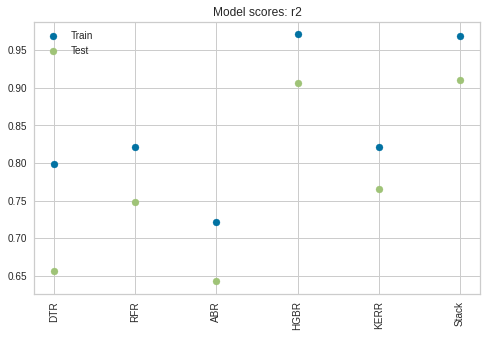

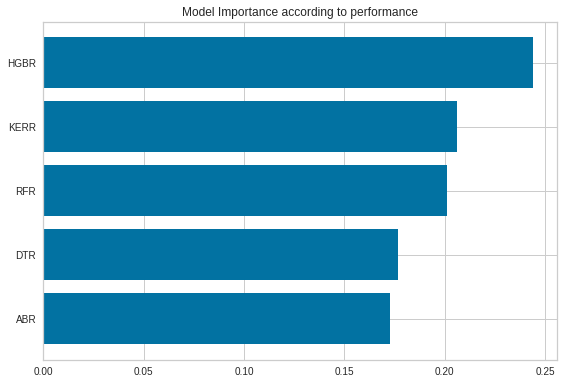

(array([['DTR', 0.7992441920611857, 0.6567084747099053],
        ['RFR', 0.8213872750696026, 0.747840401099728],
        ['ABR', 0.7215908689076294, 0.6424187747843909],
        ['HGBR', 0.9711315980327544, 0.9070154886935466],
        ['KERR', 0.8210973890230461, 0.7660351424472178],
        ['Stack', 0.9692988578693863, 0.9107460058635249]], dtype=object),
 array([['ABR', 0.1726923703409345],
        ['DTR', 0.17653366864736394],
        ['RFR', 0.2010313779294066],
        ['KERR', 0.20592241339469597],
        ['HGBR', 0.24382016968759898]], dtype=object))

In [79]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

6/6 [==============================] - 0s 4ms/step
INFO:tensorflow:Assets written to: ram://4c8fd851-991f-4064-9993-d33e0c4b466a/assets
INFO:tensorflow:Assets written to: ram://f4d93748-e33d-402d-bf96-33a5cde517ba/assets
INFO:tensorflow:Assets written to: ram://2c53ccc7-b939-42a5-8fab-38537d265020/assets
INFO:tensorflow:Assets written to: ram://e6810088-ad6e-4014-b4ef-a66f9615dc1c/assets
INFO:tensorflow:Assets written to: ram://75f6ee0a-5a2a-491c-be8c-aed813362d08/assets
INFO:tensorflow:Assets written to: ram://0bbb26f5-0941-422f-8127-b15c0c862d78/assets
INFO:tensorflow:Assets written to: ram://c37e2451-3895-45ff-bb7e-805a3855bd00/assets
INFO:tensorflow:Assets written to: ram://e7cd7ec6-1cf1-4895-8636-cefb5e1b9f26/assets


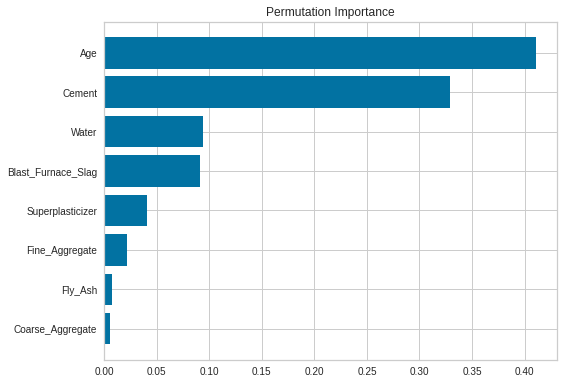

array([['Coarse_Aggregate', 0.005426329966695165],
       ['Fly_Ash', 0.007284149145797194],
       ['Fine_Aggregate', 0.021499434120796145],
       ['Superplasticizer', 0.040435439618340334],
       ['Blast_Furnace_Slag', 0.09127152012430392],
       ['Water', 0.09400155290992807],
       ['Cement', 0.32943465117686194],
       ['Age', 0.4106469229372772]], dtype=object)

In [80]:
plot_perm_importance(model, X_test, y_test)

#### Final Residuals plot

6/6 [==============================] - 0s 3ms/step


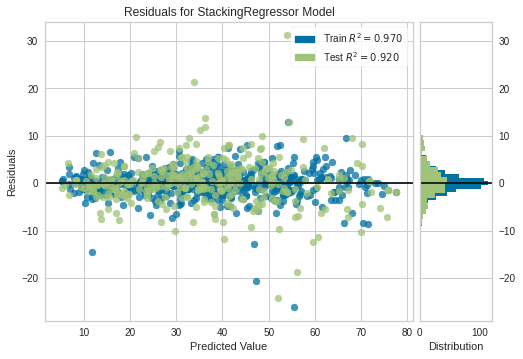

In [81]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Final Prediction error

6/6 [==============================] - 0s 3ms/step


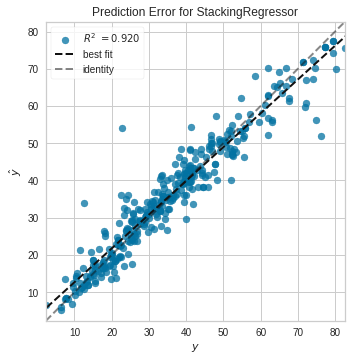

In [82]:
prediction_error(model, X_train, y_train, X_test, y_test);

## Deployment

### Save your model

In [83]:
model_name = 'model.sav' 
dump(model, model_name)

INFO:tensorflow:Assets written to: ram://209d4bb6-486c-443b-a2fe-65e6c88acdab/assets


['model.sav']

### Generate your server

In [84]:
fastapi_server(model, 'model.sav', X, y)

### Start your server

In [ ]:
run server.py

INFO:     Started server process [13349]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:57210 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:57210 - "GET /openapi.json HTTP/1.1" 200 OK
1/1 [==============================] - 0s 225ms/step
INFO:     127.0.0.1:57218 - "POST /predict HTTP/1.1" 200 OK


### Test your API at http://127.0.0.1:8000/docs